# (HW1) Multiclass SVM: iris dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
#data
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
X = iris.data[:, :2] #처음 두개의 feature만 사용할 것. 그래프 그리기 위해서
y = iris.target

In [4]:
C = 1 #SVM regulariztion parameter -> regularization 강도 의미
svc = svm.SVC(kernel = 'linear', C = 1, gamma = 'auto').fit(X, y)

In [5]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

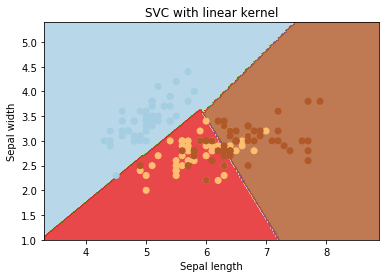

In [6]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

### change the kernel type to 'rbf'

In [7]:
svc = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X, y) 
#gamma -> 값이 클수록 training data에 정확히 fitting -> overfitting 가능성

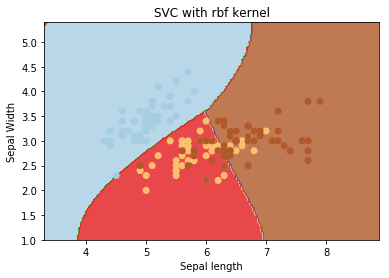

In [8]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')
plt.show()

### changing gamma
gamma: kernel coefficient. 값이 클수록 training data set에 정확히 fitting. 하나의 포인트가 미치는 영향의 범위 결정.

Text(0.5, 1.0, 'SVC with rbf kernel, C = 1, gamma = 100')

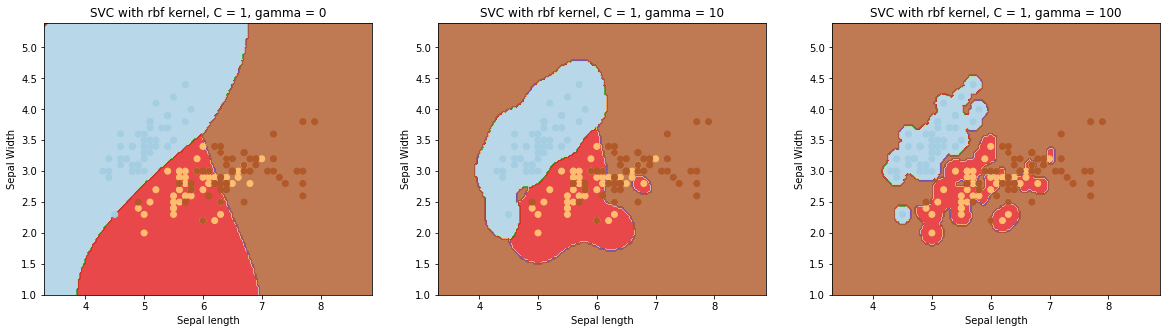

In [9]:
fig = plt.figure(figsize=(20, 5))

svc = svm.SVC(kernel = 'rbf', C =1, gamma = 'auto').fit(X, y)
a1 = fig.add_subplot(131)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
a1.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
a1.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
a1.set_xlabel('Sepal length')
a1.set_ylabel('Sepal Width')
a1.set_xlim(xx.min(), xx.max())
a1.set_title('SVC with rbf kernel, C = 1, gamma = 0')

svc = svm.SVC(kernel = 'rbf', C =1, gamma = 10).fit(X, y)
a2 = fig.add_subplot(132)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
a2.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
a2.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
a2.set_xlabel('Sepal length')
a2.set_ylabel('Sepal Width')
a2.set_xlim(xx.min(), xx.max())
a2.set_title('SVC with rbf kernel, C = 1, gamma = 10')

svc = svm.SVC(kernel = 'rbf', C =1, gamma = 100).fit(X, y)
a3 = fig.add_subplot(133)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
a3.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
a3.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
a3.set_xlabel('Sepal length')
a3.set_ylabel('Sepal Width')
a3.set_xlim(xx.min(), xx.max())
a3.set_title('SVC with rbf kernel, C = 1, gamma = 100')

### changing C

Text(0.5, 1.0, 'SVC with rbf kernel, C = 1000')

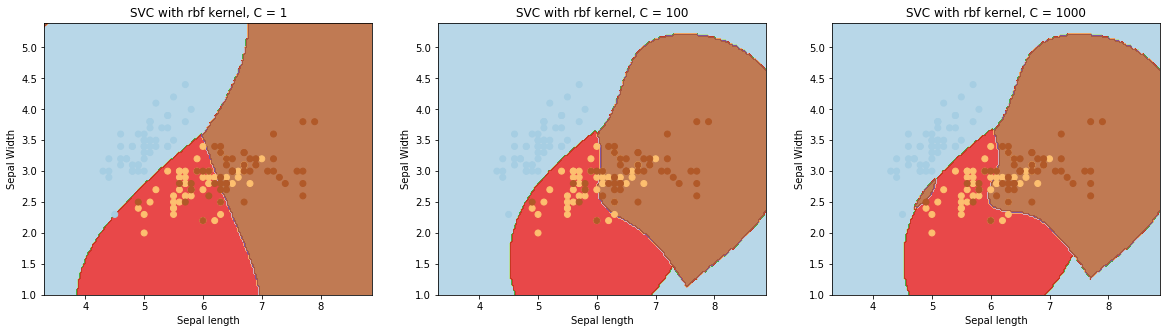

In [10]:
fig = plt.figure(figsize=(20, 5))

svc = svm.SVC(kernel = 'rbf', C =1, gamma = 'auto').fit(X, y)
a1 = fig.add_subplot(131)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
a1.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
a1.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
a1.set_xlabel('Sepal length')
a1.set_ylabel('Sepal Width')
a1.set_xlim(xx.min(), xx.max())
a1.set_title('SVC with rbf kernel, C = 1')

svc = svm.SVC(kernel = 'rbf', C =100, gamma = 'auto').fit(X, y)
a2 = fig.add_subplot(132)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
a2.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
a2.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
a2.set_xlabel('Sepal length')
a2.set_ylabel('Sepal Width')
a2.set_xlim(xx.min(), xx.max())
a2.set_title('SVC with rbf kernel, C = 100')

svc = svm.SVC(kernel = 'rbf', C =1000, gamma = 'auto').fit(X, y)
a3 = fig.add_subplot(133)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
a3.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
a3.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
a3.set_xlabel('Sepal length')
a3.set_ylabel('Sepal Width')
a3.set_xlim(xx.min(), xx.max())
a3.set_title('SVC with rbf kernel, C = 1000')

# (HW2) Weighted SVM : toy dataset

In [11]:
from sklearn.datasets import make_classification
from collections import Counter
from matplotlib import pyplot
from numpy import where
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [12]:
# Defining an imbalanced classification dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

In [13]:
# Summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


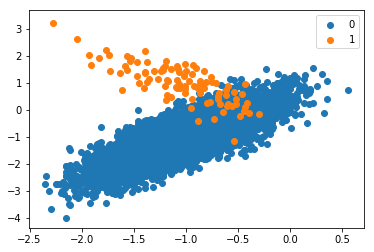

In [14]:
for label, _ in counter.items():  #[(0,9900), (0,100)]
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [15]:
# Un-weighted version
model = SVC(gamma='scale')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.804


In [16]:
scores

array([0.80414141, 0.87131313, 0.90232323, 0.72656566, 0.81373737,
       0.75080808, 0.80828283, 0.49585859, 0.96525253, 0.90191919,
       0.81626263, 0.61171717, 0.76343434, 0.89707071, 1.        ,
       0.86555556, 0.90141414, 0.71292929, 0.74666667, 0.70090909,
       0.78373737, 0.8269697 , 0.72181818, 0.81232323, 0.70111111,
       0.80222222, 0.92090909, 0.75030303, 0.82656566, 0.90969697])

In [17]:
# Weighted version
model = SVC(gamma='scale', class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.964


In [18]:
# define model
model = SVC(gamma='scale')

# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# execute the grid search
grid_result = grid.fit(X, y)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.966189 using {'class_weight': {0: 1, 1: 100}}
0.745249 (0.129002) with: {'class_weight': {0: 100, 1: 1}}
0.748407 (0.128049) with: {'class_weight': {0: 10, 1: 1}}
0.803727 (0.103536) with: {'class_weight': {0: 1, 1: 1}}
0.932620 (0.059869) with: {'class_weight': {0: 1, 1: 10}}
0.966189 (0.036310) with: {'class_weight': {0: 1, 1: 100}}
